In [1]:
import random
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
import warnings
warnings.filterwarnings('ignore')

InteractiveShell.ast_node_interactivity = "all"  # "last_expr"


%pylab inline
%matplotlib inline

np.random.seed(1)
np.set_printoptions(suppress=True, formatter={'float_kind': '{:0.5f}'.format})

# %%writefile template.py#
# %load template.py - внешний файл
# %lsmagic

Populating the interactive namespace from numpy and matplotlib


In [37]:
def plot_circuit(clf, X, y):
    plot_colors = "br"
    plot_step = 0.02
#     class_names = "AB"

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis("tight")
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='winter')

In [31]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [32]:
from sklearn.metrics import accuracy_score, f1_score, r2_score


def plot_circuit_with_errors(clf, X, Y):
    plot_circuit(clf, X, Y)
    print("------------------------------")
    print("accuracy_score : %s" % accuracy_score(clf.predict(X), Y))
    print("f1_score       : %s" % f1_score(clf.predict(X), Y))
    print("r2_score       : %s" % r2_score(clf.predict(X), Y))
    print("smape          : %s" % smape(clf.predict(X), Y))
    print("------------------------------")

In [5]:
df1 = pd.read_csv('chips.csv', header=0, sep=',')
df2 = pd.read_csv('geyser.csv', header=0, sep=',')

X1 = df1.drop(['class'], axis=1).values
Y1 = df1['class'].replace({"P": 1, "N": 0})

X2 = df2.drop(['class'], axis=1).values
Y2 = df2['class'].replace({"P": 1, "N": 0})

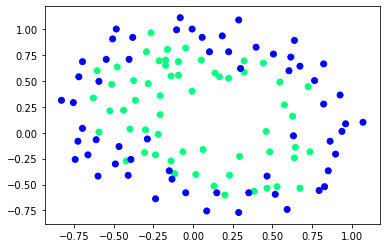

In [6]:
plt.scatter(X1[:, 0], X1[:, 1], c=Y1, cmap='winter')

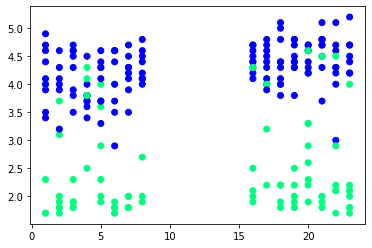

In [29]:
plt.scatter(X2[:, 0], X2[:, 1], c=Y2, cmap='winter')

In [57]:
import sklearn
import sklearn.metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import LeaveOneOut
from sklearn import model_selection

grid_param = {
    "n_estimators": np.arange(1, 21, 1),
    "random_state": [7]
}
scorer = sklearn.metrics.make_scorer(
    sklearn.metrics.f1_score)  # weighted
grid_cv = model_selection.GridSearchCV(
    AdaBoostClassifier(),
    grid_param,
    n_jobs=-1,
    scoring='accuracy',
    cv=LeaveOneOut())

# chips

In [58]:
%%time
grid_cv.fit(X1, Y1)
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.7711864406779662
{'n_estimators': 7, 'random_state': 7}
CPU times: user 1.86 s, sys: 96.9 ms, total: 1.96 s
Wall time: 11.4 s


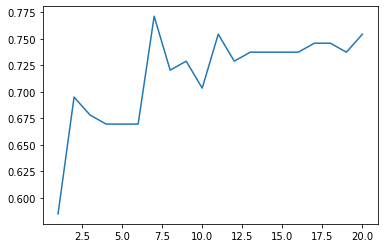

In [65]:
plt.plot(grid_cv.cv_results_["param_n_estimators"].data.tolist(), 
         grid_cv.cv_results_["mean_test_score"].tolist())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=1, random_state=7)

------------------------------
accuracy_score : 0.5932203389830508
f1_score       : 0.7073170731707317
r2_score       : -3.452830188679248
smape          : 81.35593220338983
------------------------------


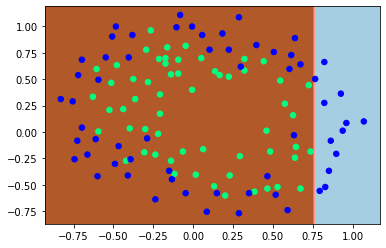

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=2, random_state=7)

------------------------------
accuracy_score : 0.7033898305084746
f1_score       : 0.7552447552447552
r2_score       : -0.4723707664884136
smape          : 59.32203389830508
------------------------------


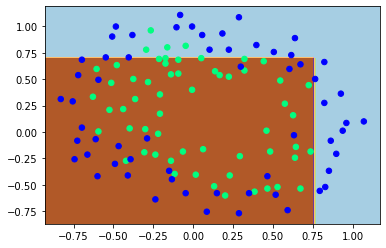

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=3, random_state=7)

------------------------------
accuracy_score : 0.7711864406779662
f1_score       : 0.8
r2_score       : -0.009185936015204454
smape          : 45.762711864406775
------------------------------


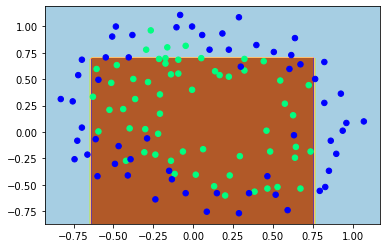

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=4, random_state=7)

------------------------------
accuracy_score : 0.8135593220338984
f1_score       : 0.8035714285714286
r2_score       : 0.24884259259259256
smape          : 37.28813559322034
------------------------------


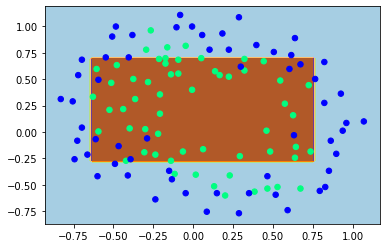

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=5, random_state=7)

------------------------------
accuracy_score : 0.8135593220338984
f1_score       : 0.8035714285714286
r2_score       : 0.24884259259259256
smape          : 37.28813559322034
------------------------------


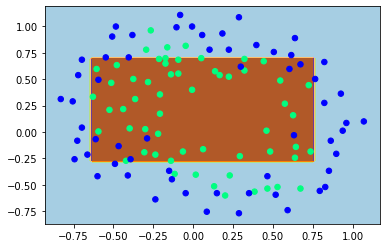

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=6, random_state=7)

------------------------------
accuracy_score : 0.7966101694915254
f1_score       : 0.8181818181818181
r2_score       : 0.13022113022113024
smape          : 40.67796610169491
------------------------------


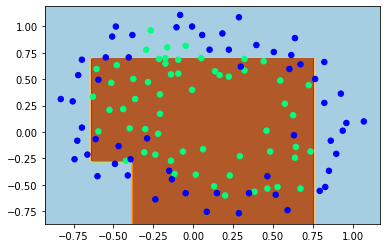

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=7, random_state=7)

------------------------------
accuracy_score : 0.8559322033898306
f1_score       : 0.8617886178861788
r2_score       : 0.4177068214804064
smape          : 28.813559322033896
------------------------------


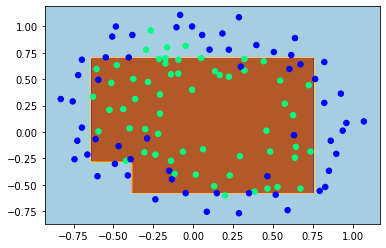

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=8, random_state=7)

------------------------------
accuracy_score : 0.847457627118644
f1_score       : 0.859375
r2_score       : 0.3678571428571429
smape          : 30.508474576271183
------------------------------


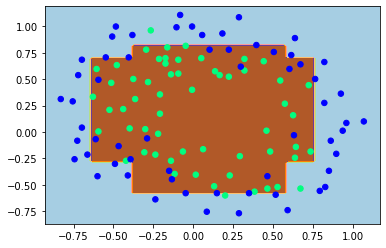

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=9, random_state=7)

------------------------------
accuracy_score : 0.847457627118644
f1_score       : 0.8524590163934426
r2_score       : 0.38541666666666663
smape          : 30.508474576271183
------------------------------


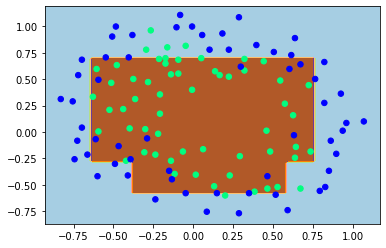

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=10, random_state=7)

------------------------------
accuracy_score : 0.847457627118644
f1_score       : 0.859375
r2_score       : 0.3678571428571429
smape          : 30.508474576271183
------------------------------


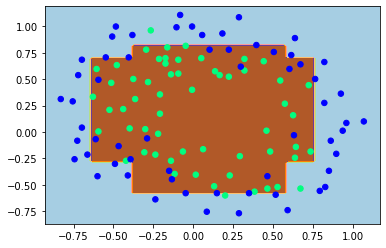

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=11, random_state=7)

------------------------------
accuracy_score : 0.847457627118644
f1_score       : 0.8524590163934426
r2_score       : 0.38541666666666663
smape          : 30.508474576271183
------------------------------


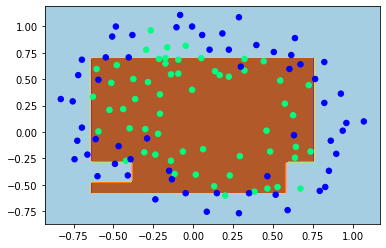

In [26]:
for i in np.arange(1, 12, 1):
    clf = AdaBoostClassifier(n_estimators=i,
                             random_state=7)
    clf.fit(X1, Y1)
    plot_circuit_with_errors(clf, X1, Y1)
    
    plt.show()

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=500, random_state=7)

------------------------------
accuracy_score : 1.0
f1_score       : 1.0
r2_score       : 1.0
smape          : 0.0
------------------------------


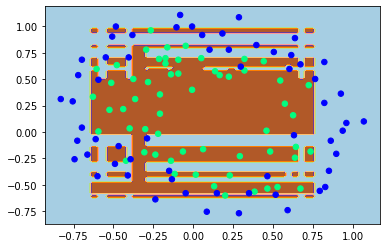

In [39]:
clf = AdaBoostClassifier(n_estimators=500,
                             random_state=7)
clf.fit(X1, Y1)
plot_circuit_with_errors(clf, X1, Y1)

plt.show()

# geyser

In [66]:
%%time
grid_cv.fit(X2, Y2)
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.8873873873873874
{'n_estimators': 11, 'random_state': 7}
CPU times: user 3.12 s, sys: 78.2 ms, total: 3.2 s
Wall time: 18.6 s


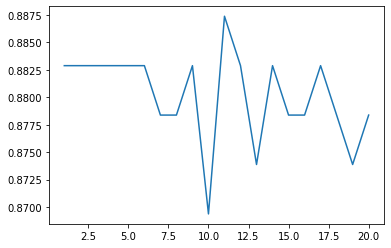

In [67]:
plt.plot(grid_cv.cv_results_["param_n_estimators"].data.tolist(), 
         grid_cv.cv_results_["mean_test_score"].tolist())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=1, random_state=7)

------------------------------
accuracy_score : 0.9009009009009009
f1_score       : 0.8641975308641975
r2_score       : 0.5540540540540542
smape          : 19.81981981981982
------------------------------


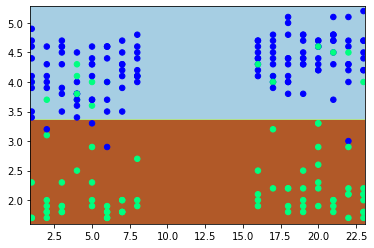

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=2, random_state=7)

------------------------------
accuracy_score : 0.9009009009009009
f1_score       : 0.8641975308641975
r2_score       : 0.5540540540540542
smape          : 19.81981981981982
------------------------------


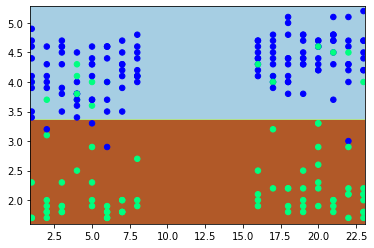

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=3, random_state=7)

------------------------------
accuracy_score : 0.9009009009009009
f1_score       : 0.8641975308641975
r2_score       : 0.5540540540540542
smape          : 19.81981981981982
------------------------------


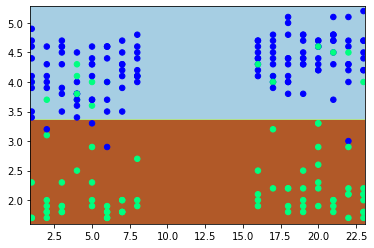

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=4, random_state=7)

------------------------------
accuracy_score : 0.9009009009009009
f1_score       : 0.8641975308641975
r2_score       : 0.5540540540540542
smape          : 19.81981981981982
------------------------------


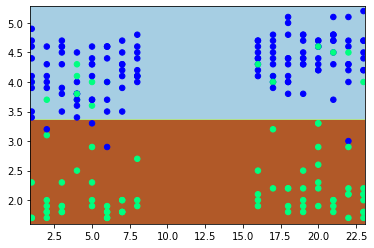

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=5, random_state=7)

------------------------------
accuracy_score : 0.9009009009009009
f1_score       : 0.8641975308641975
r2_score       : 0.5540540540540542
smape          : 19.81981981981982
------------------------------


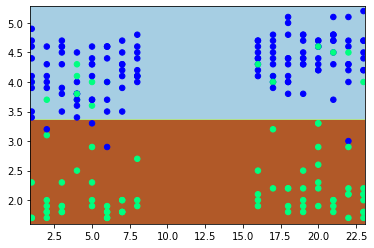

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=6, random_state=7)

------------------------------
accuracy_score : 0.9009009009009009
f1_score       : 0.8641975308641975
r2_score       : 0.5540540540540542
smape          : 19.81981981981982
------------------------------


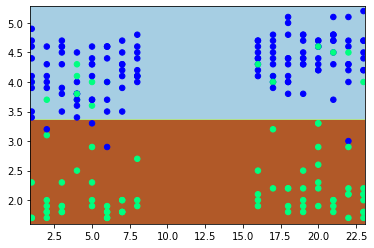

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=7, random_state=7)

------------------------------
accuracy_score : 0.9009009009009009
f1_score       : 0.8641975308641975
r2_score       : 0.5540540540540542
smape          : 19.81981981981982
------------------------------


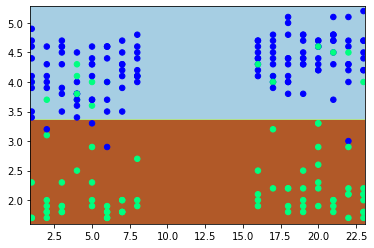

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=8, random_state=7)

------------------------------
accuracy_score : 0.9009009009009009
f1_score       : 0.8625
r2_score       : 0.5477777777777777
smape          : 19.81981981981982
------------------------------


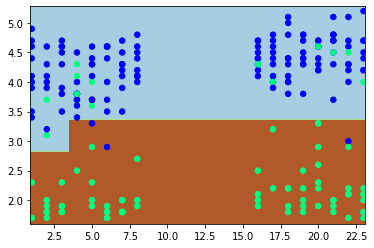

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=9, random_state=7)

------------------------------
accuracy_score : 0.9009009009009009
f1_score       : 0.8625
r2_score       : 0.5477777777777777
smape          : 19.81981981981982
------------------------------


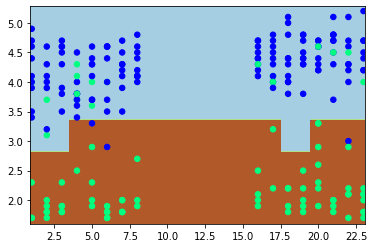

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=10, random_state=7)

------------------------------
accuracy_score : 0.9009009009009009
f1_score       : 0.8625
r2_score       : 0.5477777777777777
smape          : 19.81981981981982
------------------------------


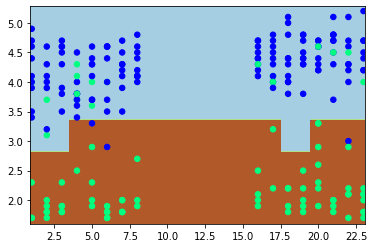

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=11, random_state=7)

------------------------------
accuracy_score : 0.9009009009009009
f1_score       : 0.8607594936708862
r2_score       : 0.5409774436090227
smape          : 19.81981981981982
------------------------------


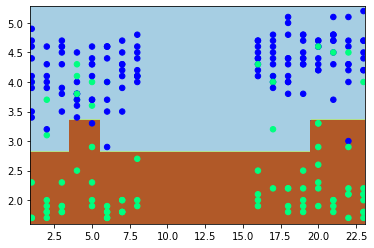

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=12, random_state=7)

------------------------------
accuracy_score : 0.9054054054054054
f1_score       : 0.8679245283018867
r2_score       : 0.5651525044305569
smape          : 18.91891891891892
------------------------------


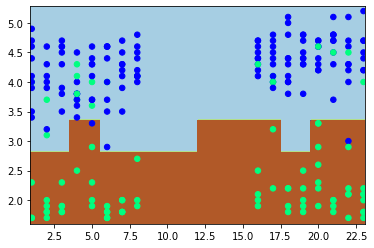

In [38]:
for i in np.arange(1, 13, 1):
    clf = AdaBoostClassifier(n_estimators=i,
                             random_state=7)
    clf.fit(X2, Y2)
    plot_circuit_with_errors(clf, X2, Y2)
    
    plt.show()

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=14, random_state=7)

------------------------------
accuracy_score : 0.9054054054054054
f1_score       : 0.8679245283018867
r2_score       : 0.5651525044305569
smape          : 18.91891891891892
------------------------------


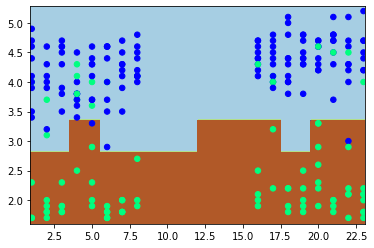

In [106]:
clf = AdaBoostClassifier(n_estimators=14,
                         random_state=7)
clf.fit(X2, Y2)
plot_circuit_with_errors(clf, X2, Y2)

plt.show()